Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

##### <font color = 'red'> OBS: Enquanto o modelo de Machine Learning aprende com as características que nomeamos, as funções de Deep Learning extraem essas características, pois entendem quais características são essas.</font>

Explorando os dados

In [12]:
len(imagens_treino)
imagens_treino.shape # O primeiro número indica que temos 60 000 imagens, o segundo que são compostas de 28 linhas e o terceiro que elas são compostas de 28 colunas.
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

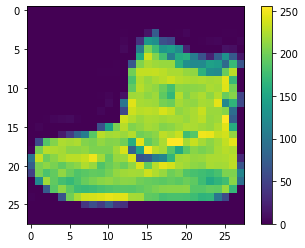

In [13]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''  
# Que cores tem nossa imagem?
plt.imshow(imagens_treino[0])
plt.colorbar()

Exebição dos dados

## NORMALIZANDO AS IMAGENS

In [14]:
# A função não linear introduz no modelo a transformação dos dados necessária para identificarmos as diferenças nas imagens que vamos classificar. Nesse caso, escolhemos a função ReLU.

# Dividindo a cor em um intervalo de 0 a 1: (ajuda a diminuir a perda)
imagens_treino = imagens_treino/float(255) # Normalização.

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)), # Podemos observar a nossa camada de entrada, ou camada 0 que está “achatando” as nossas imagens de 28 por 28 pixels em um array de 784 pixels.
    # Camada de entrada:
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento:  A camada dense (densa) é aquela que faz as conexões entre todas as unidades da camada 2 com as unidades da camada 1. (camada 1)  
    # Camadas ocultas: 
    # OBS: Como o modelo tem mais camadas para extrair características, ele tem um trabalho maior, o que gera um aumento no tempo que ele leva para treinar.
    keras.layers.Dense(128, activation=tensorflow.nn.relu), # (camada 2)
    keras.layers.Dense(64, activation=tensorflow.nn.relu), # (camada 3)
    # Camada de saída:
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # Saída
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4840


In [15]:
# TENTANDO COPILAR COM MENOS CAMADA PARA PODER REDUZIR A PERDA -> NO CASO DA AULA A DIFERNÇA FOI MAIS SUBSTANCIAL

# A função não linear introduz no modelo a transformação dos dados necessária para identificarmos as diferenças nas imagens que vamos classificar. Nesse caso, escolhemos a função ReLU.

# Dividindo a cor em um intervalo de 0 a 1: (ajuda a diminuir a perda)
imagens_treino = imagens_treino/float(255) # Normalização.


CRIANDO E NORMALIZANDO O MODELO

In [ ]:
modelo = keras.Sequential([ 
    # Camada de entrada:
    keras.layers.Flatten(input_shape=(28, 28)), # Podemos observar a nossa camada de entrada, ou camada 0 que está “achatando” as nossas imagens de 28 por 28 pixels em um array de 784 pixels.
    # Camadas ocultas: 
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento:  A camada dense (densa) é aquela que faz as conexões entre todas as unidades da camada 2 com as unidades da camada 1. (camada 1)  
    keras.layers.Dropout(0.2), # Tentar deixar adormecido algumas camadas para tentar melhorar na acuracia e na perda (NORMALIZANDO O MODELO) (CAMADA 2)
    # OBS: Como o modelo tem mais camadas para extrair características, ele tem um trabalho maior, o que gera um aumento no tempo que ele leva para treinar.
    # Camada de saída:
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # Saída (CAMADA 3)
])

# OBS: Os modelos visam minimizar a perda e aumentar a acurácia de teste.
# OBS: Algo fundamental que serve tanto para Deep learning quanto Machine learning, redes neurais ou qualquer sistema que lide com probabilidades é sempre garantir que o modelo generalize bem para dados novos.

COMPILANDO O MODELO


In [ ]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']) # Para saber quando o nosso moodelo esta acertando

TREINANDO E NORMALIZANDO O MODELO

In [ ]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2) # O epoch serve para aumentar o número de treinos e diminuir a perda, depois colocamas qual a parte que queremos para a valiidação

SALVANDO E CARREGANNDO O MODELO TREINADO

In [12]:
modelo.save('modelo.h5') # Para salvar o modelo
modelo_salvo = load_model('modelo.h5')

In [8]:
historico.history

{'accuracy': [0.6505625247955322,
  0.7640416622161865,
  0.7917291522026062,
  0.8082083463668823,
  0.8193333148956299],
 'loss': [1.0897984504699707,
  0.6568430066108704,
  0.5810146331787109,
  0.5373198390007019,
  0.5061997175216675],
 'val_accuracy': [0.7569166421890259,
  0.784333348274231,
  0.8073333501815796,
  0.8174166679382324,
  0.8265833258628845],
 'val_loss': [0.7004759907722473,
  0.5885360836982727,
  0.5378029346466064,
  0.5077857375144958,
  0.4835027754306793]}

VIZALIZANDOO AS ACURACIAS DE TREINO E DE VALIDAÇÃO POR ÉPOCA

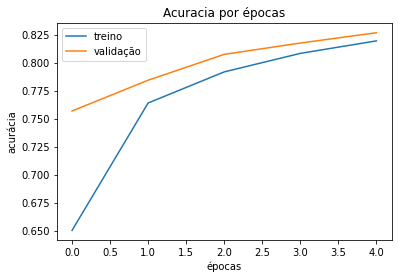

In [9]:
plt.plot(historico.history['accuracy']) # Acuracia de treino
plt.plot(historico.history['val_accuracy']) # Acuracia de validação
plt.title('Acuracia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

VISUALIZANDO AS PERDAS DE TREINO E VALIIDAÇÃO POR TEMPO

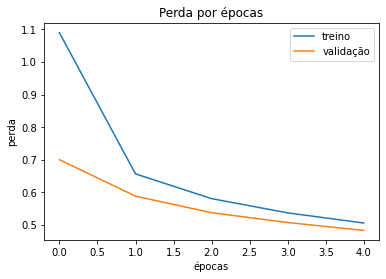

In [10]:
''' 
OBS: Repare na curva de validação na qual o erro aumenta cada vez mais e na curva de treino que ele apenas reduz. 
Isso indica que nosso modelo está perdendo pouquíssima informação no treino e muita na validação. 
O que mostra que ele está servindo bem demais o modelo, overfitting.
'''
plt.plot(historico.history['loss']) # Acuracia de treino
plt.plot(historico.history['val_loss']) # Acuracia de validação
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

TESTANDO O MODELO E O MODELO SALVO

In [14]:
testes = modelo.predict(imagens_teste)
# Para saber qual foi o resultado desse teste é nescessário pegar o maior número e sua posição vai indicar se acertou ou errou
print('Resultado teste:',  np.argmax(testes[1]))
print('Número da imagem de teste:',  identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste:',  identificacoes_teste[1])

Resultado teste: 2
Número da imagem de teste: 2
resultado teste modelo salvo: 2
Número da imagem de teste: 2


AVALIANDO O MODELO

In [6]:
# Fazendo uma função de avaliação 
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste) # Essa função avalia como o nosso modelo está indo com os dados de teste, fornecendo os dados de acurácia e perda.
print('Perda do teste:', perda_teste)
print('Acuracia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 61.3935 - accuracy: 0.8495
Perda do teste: 61.39346694946289
Acuracia do teste: 0.8495000004768372
